# Introduction to Deep Learning with Lasagne

## Before starting, a review of concepts ..
### Supervised Learning

La forma más comun de *machine learning*, sea profundo o no, es el aprendizaje supervisado.
Si queremos realizar un clasificador a partir de imagenes, vamos a recolectar las mismas y asociarles una etiqueta. En etapa de entrenamiento, una imagen es mostrada al clasificador y este genera una salida en forma de vector con *scores*, uno para cada categoría. La idea es que la categoría deseada tenga el *score* más alto posible. 

![knobs](../images/workflow.png "workflow")

Workflow tomado de [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

Durante el entrenamiento calculamos una función que mide el error o distancia entre los *scores* que genera nuestro clasificador y los valores reales. Con el resultado de esta función, el clasificador modifica sus parametros para reducir este error. Estos parametros, usualmente llamados pesos, se pueden ver como "perillas" que definen la función entrada-salida de nuestro clasificador.


![knobs](../images/knobs.jpg "knobs")


## Redes neuronales

Ahora, pensemos en un problema, donde tenemos acceso a datos etiquetados del tipo $(x_i, y_i)$. Las redes neuronales nos permiten definir hipotesis no lineales y complejas de la forma $h_{W, b}(x)$, donde $W, b$ son los parametros que podemos adaptar a nuestros datos $(x_i, y_i)$.

![knobs](../images/rn.png "rn")

Consideremos una red neuronal con $N$ capas, las capas de entrada y salida estan representadas respectivamente como $X_0$ y $X_N$, donde el vector $X_{n-1}$ es la capa de entrada de $n$ (con $n=1, \cdots, N$).
Si $W_n$ es la matriz de pesos y $b_n$ el vector de bias, la salida de la capa $X_n$, puede ser representada de la siguiente manera:

$X_n = f(W_{n}X_{n-1} + b_n)$

Donde $f$ es la función de activación.

![activation](../images/activation.png "activation cheatsheet https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network")
Imagen de [https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network](https://www.quora.com/What-is-the-role-of-the-activation-function-in-a-neural-network)

Para ajustar los pesos, el algoritmo de aprendizaje computa el gradiente del vector, por cada peso, indicando por que cantidad el error se incrementaría o reduciría si el peso se aumentara en una pequeña cantidad. Luego el vector del peso es actualizado en la dirección opuesta al gradiente.

La **función objetivo**, promedidada sobre todos los elementos del entrenamiento, se puede ver como un paisaje montañoso. El vector del gradiente negativo nos indica la dirección hacia el terreno próximo con menor error, llevandonos asi al mínimo posible.

In [1]:
from lasagne import objectives
dir(objectives)

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, CuDNN not available)


['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'aggregate',
 'align_targets',
 'as_theano_expression',
 'binary_accuracy',
 'binary_crossentropy',
 'binary_hinge_loss',
 'categorical_accuracy',
 'categorical_crossentropy',
 'multiclass_hinge_loss',
 'squared_error',
 'theano']

In [2]:
from lasagne import nonlinearities
dir(nonlinearities)

['LeakyRectify',
 'SELU',
 'ScaledTanH',
 'ScaledTanh',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'elu',
 'identity',
 'leaky_rectify',
 'linear',
 'rectify',
 'selu',
 'sigmoid',
 'softmax',
 'softplus',
 'tanh',
 'theano',
 'very_leaky_rectify']

Para llevar esta busqueda de error mínimo a la practica, se utiliza **Stochastic Gradient Descent**, esto consta de mostrar los vectores de entrada de un subconjunto de datos de entrenamiento, se computan las salidas, sus errores, se computa el gradiente para esos ejemplos y se ajustan los pesos acorde. Este proceso se repite por sobre varios subconjuntos de ejemplos hasta que el promedio de la función objetivo deja de decrecer.

Dado un problema de reconocimiento, la tarea del entrenamiento consiste en encontrar el conjunto de parametros óptimos $\{W_{n}, b_{n}\}$ que minimizan el error de clasificación.
Para determinar como estos parámetros se deberían modificar para reducir el error, se utiliza comunmente un algortimo de *gradient descent*.

La predicción del error la denotamos como  $e(X_{N}, X_{true})$. El gradiente de $e(X_{N}, X_{true})$ es calculado teniendo en cuenta los parámetros del modelo $\{W_{n}, b_{n}\}$.
Los valores de cada capa son actualizados mediante la toma de pequeños pasos:

$W_{n} \gets W_{n} - \eta  \frac{\partial e(X_{N}, X_{true})}{\partial W_{n}}$

$b_{n} \gets b_{n} - \eta  \frac{\partial e(X_{N}, X_{true})}{\partial b_{n}}$

Donde, $\eta$ es la *tasa de aprendizaje*, un hiperparámetro que controla el tamaño del paso hacia la convergencia.

Una buena práctica es trabajar con un $\eta$ que decrece de forma lineal a medida que los *epochs* avanzaban, mientras que el *momentum* se incrementaba.

![alt text](../images/saddle_point_evaluation_optimizers.gif "gif de http://sebastianruder.com/optimizing-gradient-descent/")
Grafico de http://sebastianruder.com/optimizing-gradient-descent/

In [3]:
from lasagne import updates
dir(updates)

['OrderedDict',
 'T',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'adadelta',
 'adagrad',
 'adam',
 'adamax',
 'apply_momentum',
 'apply_nesterov_momentum',
 'get_or_compute_grads',
 'momentum',
 'nesterov_momentum',
 'norm_constraint',
 'np',
 'rmsprop',
 'sgd',
 'theano',
 'total_norm_constraint',
 'utils']

![alt text](../images/deeplearning.jpg "dl")

### But ... What is Deep Learning ?

Deep learning permite que modelos computacionales compuestos por varias capas de procesamiento puedan aprender representaciones sobre datos con múltiples niveles de abstracción y, mediante esto, descubrir representaciones precisas en grandes volúmenes de datos de forma autónoma. 
Particularmente, Convolutional Neural Networks (ConvNets) constituyen el estado del arte de varios problemas de visión computacional, dado su gran desempeño de clasificación en grandes volúmenes de imágenes. Su gran performance está basada en cuatro ideas basales: conexiones locales, pesos compartidos, pooling y el uso de varias capas. 
![alt text](../images/capas_de_abstracci.png "structure")


### ConvNets
![alt text](../images/convnets.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

Una arquitectura clásica de ConvNet esta dada por dos etapas. La primer etapa se enfoca en **extraer características discriminantes** a distintos niveles de abstracción y la segunda se enfoca en la **clasificación** a partir de las características obtenidas previamente. La primera instancia esta compuesta por dos tipos de capas: de convolución y *pooling*.

<!---Las arquitecturas de ConvNets asumen que los datos con los que se trabajara son arreglos multidimensionales, gracias a esta suposición varias cualidades de los datos se pueden embeber en la arquitectura de la red. A diferencia de las redes neuronales convencionales, las *ConvNets* cuentan con unidades organizadas en tres dimensiones: ancho, alto y profundidad. --->

![alt text](../images/cnn.jpg "structure from http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")




### Different types of layers

In [4]:
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.nonlinearities import rectify

#### Dense Layers

Todas las unidades ocultas estan conectadas con todas las unidades de entrada!

In [5]:
(DenseLayer, {'num_units': 256, 'nonlinearity': rectify})

(lasagne.layers.dense.DenseLayer,
 {'nonlinearity': <function lasagne.nonlinearities.rectify>, 'num_units': 256})

#### Capas de Convolución

En las capas de convolución, las unidades estan organizadas en *feature maps*, en las cuales cada unidad
esta conectada a *patches* locales de los *feature maps* pertenecientes a la capa anterior mediante un conjunto de pesos, llamados *filter bank*. Todas las unidades dentro de un *feature map* comparten el mismo *filter bank*, distintos *feature maps* dentro de la misma capa usan diferentes *filter banks*, la disposición de estos tiene dos justificaciones, por un lado, datos en forma de arreglos, como en nuestro caso, imágenes, subconjuntos locales tienden a estar altamente correlacionados y por otro lado la estadística local de las imágenes son invariantes a su ubicación.


![alt text](../images/Convolution_schematic.gif "gif de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")
*http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/


In [6]:
(Conv2DLayer, {'num_filters': 32, 'filter_size': 2})

(lasagne.layers.conv.Conv2DLayer, {'filter_size': 2, 'num_filters': 32})

#### Max Pooling
Para reducir la dimensionalidad de los *feature maps*, una capa de *pooling* es ubicada entre las capas de convolución. Las capas de *pooling* eliminan los valores no máximos calculando una función de agregación, comunmente se utiliza el maximo o el promedio sobre pequeñas regiones de la entrada. El proposito general de las capas de *pooling* es reducir el costo computacional en las capas ulteriores, reduciendo el tamaño de los futuros mapas de características y otorgando una forma de invariancia traslacional.


![alt text](images/maxpool.jpg " imagen de http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/")

In [7]:
(MaxPool2DLayer, {'pool_size': 2})

(lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2})


#### Dropout

Dropout es una técnica que previene que una red caiga en *overfitting* y provee una manera de combinar de forma eficiente varias arquitecturas de redes neuronales juntas.
El termino de dropout se refiere al descarte de unidades y sus conexiones (ya sea en capas ocultas o no) en una red neuronal, este descarte es solo temporal. La forma de elección de descarte es aleatoria, a cada unidad se le asocia un valor de probabilidad $p$ independiente del resto entre [0, 1].
![alt text](images/dropout_.png " de http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")

In [8]:
(DropoutLayer, {'p': 0.5})

(lasagne.layers.noise.DropoutLayer, {'p': 0.5})

## Lasagne


In [9]:
from IPython.display import IFrame
IFrame('http://lasagne.readthedocs.io/en/latest/', width=900, height=350)

# Clasifiquemos el tipo de nave que aparece en la imagen!

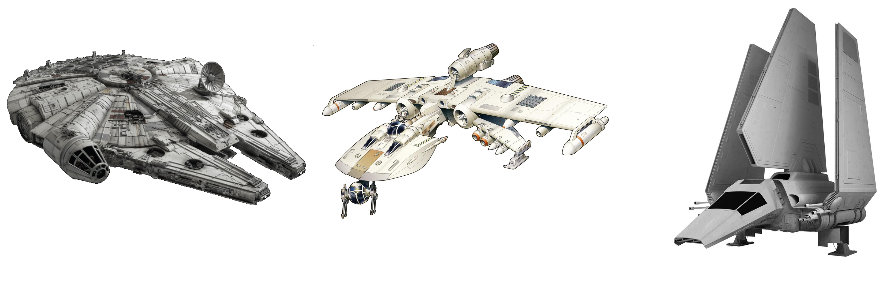

In [10]:
from IPython.display import Image
Image(filename='../images/ships.png') 

# Cómo son nuestros datos de entrada?
![alt text](../images/dataset.png)

### Cargando Imágenes a un Dataframe

In [1]:
import os
import pandas as pd
import cv2

In [2]:
def images_to_file(path_to_photos):
    """ """
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print(catenc)
    df_out.to_csv('../star_wars_data.csv')
    
    return df_out

In [ ]:
images_to_file("../data/all/")

### Cómo quedo el archivo que generamos?

In [20]:
!head ../star_wars_data.csv

,Image,Model,Model_enc
falcon_165,135 94 30 14 3 7 2 7 5 7 6 4 6 5 20 58 58 20 20 18 17 26 22 29 20 6 11 10 14 47 81 140 144 150 163 146 99 115 117 140 141 153 157 93 102 204 139 115 140 150 63 14 20 35 38 32 63 49 53 42 65 67 75 107 159 117 37 68 113 43 102 57 30 37 52 20 12 22 23 34 24 28 29 66 94 56 38 46 53 39 23 53 58 21 63 119 152 81 76 148 161 253 228 172 212 242 228 223 227 213 168 177 164 138 105 125 147 144 144 132 140 130 124 130 127 137 174 196 79 41 36 18 11 5 5 4 6 5 5 7 9 5 15 48 60 22 13 14 18 25 21 25 24 11 11 9 10 36 69 125 143 145 153 150 104 113 113 128 142 145 165 160 109 161 166 133 126 161 79 10 39 36 43 40 43 47 37 47 56 69 114 136 157 88 45 89 137 76 87 111 74 61 34 15 14 18 25 16 24 16 23 69 90 56 36 35 45 39 32 34 49 26 55 139 100 65 79 67 152 255 221 171 225 224 192 167 166 177 162 164 155 121 107 124 157 156 128 128 132 129 132 156 183 202 206 189 28 42 42 17 19 31 1 16 8 5 5 8 11 5 10 36 60 28 9 11 16 18 20 23 25 16 10 11 9 24 58 110 137 136 141 149 104 99

### Ahora a darle formato a nuestros datos para nuestra red ...

In [3]:
import numpy as np
from sklearn.utils import shuffle

In [4]:
def load(images_dir="../data/all/"):
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

### What we need to build our net ??

In [6]:
import warnings; warnings.simplefilter('ignore')
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

### How can we define the architecture of our network?

In [7]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=[
                (InputLayer, {'shape': (None, 1, 128, 128)}),
                (Conv2DLayer, {'num_filters': 16, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                # (DropoutLayer, {'p': 0.5}),
                (Conv2DLayer, {'num_filters': 16, 'filter_size': 3, 'W': lasagne.init.GlorotUniform()}),
                (MaxPool2DLayer, {'pool_size': 2}),
                (DenseLayer, {'num_units': 100, 'nonlinearity': lasagne.nonlinearities.rectify}),
                (DropoutLayer, {'p': 0.5}),
                (DenseLayer, {'num_units': 3, 'nonlinearity': lasagne.nonlinearities.softmax}),
        ],
        update=nesterov_momentum,
        update_learning_rate=0.008,
        update_momentum=0.9,
        regression=False,
        objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=BatchIterator(batch_size=512),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.03, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=max_epochs,
        verbose=1)

### Some Hyperparameter Tuning

Alguno de los parametros más importantes a la hora de entrenar nuestra red son:
 - La estructura de la red
 - La tasa de aprendizaje, tipos de actualización
 - La inicialización de los pesos W
 - Regularización
 

![alt text](../images/split.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Imagen de [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

In [8]:
from sklearn.cross_validation import train_test_split
x, y = load("../data/all")
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)

(array([0, 1, 1, ..., 0, 0, 1]), Index(['falcon', 'lambda', 'kwing'], dtype='object'))
(2924, 1, 128, 128)


In [9]:
net = create_net(20)
net.fit(X_train, y_train)

# Neural Network with 1442883 learnable parameters

## Layer information

  #  name        size
---  ----------  ----------
  0  input0      1x128x128
  1  conv2d1     16x126x126
  2  maxpool2d2  16x63x63
  3  conv2d3     16x61x61
  4  maxpool2d4  16x30x30
  5  dense5      100
  6  dropout6    100
  7  dense7      3

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     1.07604     1.01509    1.06004      0.61368  3.29s
      2     0.98649     0.94188    1.04736      0.55556  3.32s
      3     0.89528     0.74480    1.20204      0.71453  3.26s
      4     0.78682     0.70425    1.11724      0.72308  3.26s
      5     0.74194     0.63132    1.17523      0.78291  3.25s
      6     0.65757     0.51126    1.28616      0.82393  3.28s
      7     0.59572     0.57428    1.03734      0.79829  3.27s
      8     0.60949     0.47768    1.27594      0.79658  3.24s
      9     0.55639     0.40754    1.36524      0.856

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f52e22cf908>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f52e22cf8d0>,
     check_input=True, custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'num_filters': 16, 'filter_size': 3, 'W': <lasagne.init.GlorotUniform object at 0x7f52ec74b780>}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<cla....layers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x7f52e25bc158>})],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x7f52e0c5b378>,
     objective_loss_function=<function categorical_crossentropy at 0x7f52e231c158>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7f52ec74b668>],
     on_training_finished=[],
     on_tr

#### How can we test our net?

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [11]:
print(classification_report(y_test, net.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.93      0.95       330
          1       0.95      0.98      0.96       473
          2       0.97      0.96      0.96       451

avg / total       0.96      0.96      0.96      1254



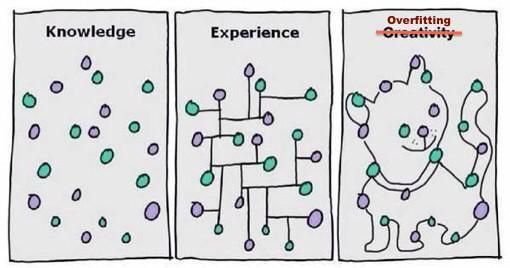

In [33]:
from IPython.display import Image
Image(filename='../images/overfitting.jpg') 

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### Looking up our *learning rate*

![alt text](../images/lr.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Imagen de [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

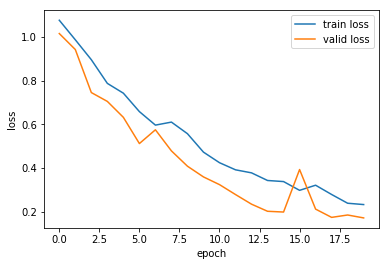

In [13]:
%matplotlib inline
visualize.plot_loss(net)

#### Cómo le fue a nuestra red entrenada en cuanto a clasificación de nuevas naves?
![alt text](../images/confusion_matrix.png)

In [14]:
def plot_matrix(clf, X_test, y_test):
    """Plot Confussion Matrix from a given classifier"""
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))



Normalized confusion matrix
[[ 0.93030303  0.04545455  0.02424242]
 [ 0.00634249  0.98097252  0.01268499]
 [ 0.01773836  0.02439024  0.9578714 ]]
[[307  15   8]
 [  3 464   6]
 [  8  11 432]]


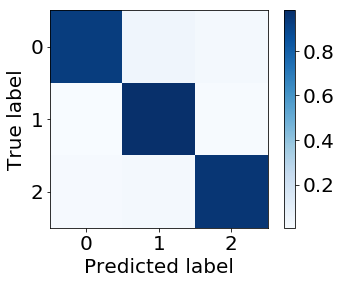

In [15]:
plot_matrix(net, X_test, y_test)
print(confusion_matrix(y_test, net.predict(X_test)))

### You can save your network in a pickle!
![alt text](../images/pickle.jpg)

In [16]:
import pickle

In [ ]:
with open('../data/ship_classifier.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

In [2]:
net = None
with open('../data/ship_classifier.pickle', 'rb') as f:
       net = pickle.load(f)

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, CuDNN not available)
/usr/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net.verbose = 1
net.initialize()
layer_info(net)

# Neural Network with 1442883 learnable parameters

## Layer information

  #  name        size
---  ----------  ----------
  0  input0      1x128x128
  1  conv2d1     16x126x126
  2  maxpool2d2  16x63x63
  3  conv2d3     16x61x61
  4  maxpool2d4  16x30x30
  5  dense5      100
  6  dropout6    100
  7  dense7      3



### Qué pasa dentro de la red?

In [42]:
net.layers

[(lasagne.layers.input.InputLayer, {'shape': (None, 1, 128, 128)}),
 (lasagne.layers.conv.Conv2DLayer,
  {'W': <lasagne.init.GlorotUniform at 0x7f54faf909b0>,
   'filter_size': 3,
   'num_filters': 16}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.conv.Conv2DLayer,
  {'W': <lasagne.init.GlorotUniform at 0x7f54faf90f60>,
   'filter_size': 3,
   'num_filters': 16}),
 (lasagne.layers.pool.MaxPool2DLayer, {'pool_size': 2}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.rectify>,
   'num_units': 100}),
 (lasagne.layers.noise.DropoutLayer, {'p': 0.5}),
 (lasagne.layers.dense.DenseLayer,
  {'nonlinearity': <function lasagne.nonlinearities.softmax>, 'num_units': 3})]

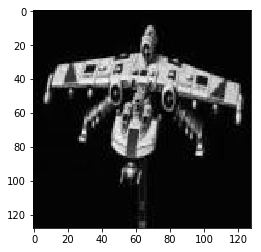

In [20]:
%matplotlib inline

my_image = cv2.imread("../data/kwing.jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [44]:
net.predict(X)

array([2])

#### Qué tan segura esta mi red de que identifico  ??

In [45]:
proba = net.predict_proba(X)
proba, proba.sum()

(array([[  1.67391809e-05,   1.22942883e-08,   9.99983311e-01]], dtype=float32),
 1.0000001)

In [46]:
proba[0, np.argmax(proba)]

0.99998331

#### Qué pasa si tapamos partes de nuestra imagen?? Que partes son importantes para la clasificación??

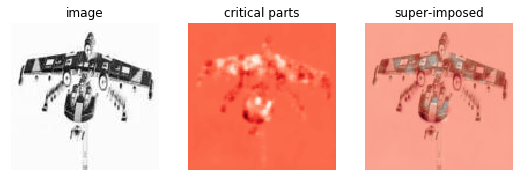

In [56]:
h = visualize.plot_occlusion(net, X, [2], square_length=3)

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

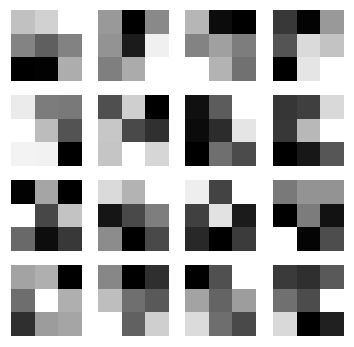

In [48]:
visualize.plot_conv_weights(net.layers_[1])

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

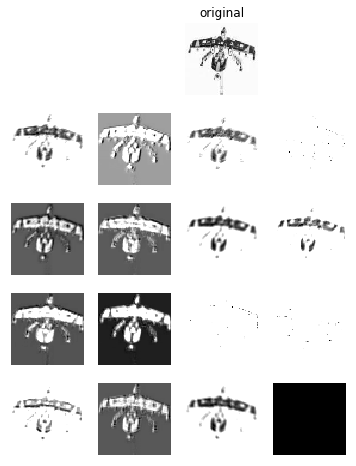

In [21]:
visualize.plot_conv_activity(net.layers_['conv2d3'], X)

### Ahora usemos nuestra red para clasificar desde video!!

In [22]:
tipos_naves = {0: 'Falcon', 1: 'Lambda', 2: 'K-wing'}

def format_net(my_image):
        X = np.vstack(my_image) / 255.
        X = X.astype(np.float32)
        X = X.reshape(-1, 1, 128, 128)
        
        return X

#### Mostrando el resultado frame por frame

In [23]:
import time
import cv2

def classifier_over_video(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        
        pred = tipos_naves[net.predict(X)[0]]
        proba = net.predict_proba(X)
        proba = str(proba[0, np.argmax(proba)])
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, pred, (10, 500), font, 4, (255,255,255), 2, cv2.LINE_AA)
        cv2.putText(frame, proba, (10, 800), font, 4, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()

In [24]:
classifier_over_video("../data/videos_demo/k-wing_nerdearla.mp4")

In [25]:
import time
import cv2

def classifier_over_cam():
    cap = cv2.VideoCapture(1)
    print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    if not cap.isOpened():
        return "bad luck"
  
    while(True):
        ret, frame = cap.read()
        if frame != None:
            frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            frame_ = cv2.equalizeHist(frame_)
            res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
            X = format_net(res)

            pred = tipos_naves[net.predict(X)[0]]
            proba = net.predict_proba(X)
            proba = str(proba[0, np.argmax(proba)])

            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(frame, pred, (10, 200), font, 2, (255,255,255), 2, cv2.LINE_AA)
            cv2.putText(frame, proba, (10, 300), font, 2, (255,255,255), 2, cv2.LINE_AA)

            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            cap.release()
            break

    cap.release()
    cv2.destroyAllWindows()

In [28]:
classifier_over_cam()

640.0
480.0


#### Con una pequeña trampa podemos tener una idea mas estable sobre el video ...

In [134]:
import time
import cv2
from collections import Counter

def classifier_over_video_most_common(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    clase = []
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)
        clase.append(net.predict(X)[0])
        font = cv2.FONT_HERSHEY_SIMPLEX
        mi_nave_frecuente = Counter(clase).most_common(1)[0][0]
        cv2.putText(frame, tipos_naves[mi_nave_frecuente], (10,500), font, 4,(255,255,255), 2, cv2.LINE_AA)
        cv2.imshow('frame', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()

In [135]:
classifier_over_video_most_common("../data/videos_demo/lambda.mp4")

### Ahora armemos una red para regresion

In [136]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

In [137]:
data_coordinates = pd.read_json("../data/landmarks.json")
data_coordinates

annotations  class  \
0     [{'class': 'point', 'x': 56.41939339381177, 'y...  image   
1     [{'class': 'point', 'x': 92.34564389570087, 'y...  image   
2     [{'class': 'point', 'x': 92.09264213160306, 'y...  image   
3     [{'class': 'point', 'x': 46.04632106580153, 'y...  image   
4     [{'class': 'point', 'x': 55.407386337420526, '...  image   
5     [{'class': 'point', 'x': 56.67239515790958, 'y...  image   
6     [{'class': 'point', 'x': 95.63466682897241, 'y...  image   
7     [{'class': 'point', 'x': 95.1286633007768, 'y'...  image   
8     [{'class': 'point', 'x': 50.34735105546431, 'y...  image   
9     [{'class': 'point', 'x': 59.202412798887686, '...  image   
10    [{'class': 'point', 'x': 47.5643316503884, 'y'...  image   
11    [{'class': 'point', 'x': 94.11665624438555, 'y...  image   
12    [{'class': 'point', 'x': 96.64667388536365, 'y...  image   
13    [{'class': 'point', 'x': 50.60035281956212, 'y...  image   
14    [{'class': 'point', 'x': 44.02230695301905, 'y...  image   
15    [{'class': 'point', 'x': 48.57633870677964, 'y...  image   
16    [{'class': 'point', 'x': 95.63466682897241, 'y...  image   
17    [{'class': 'point', 'x': 95.88766859307022, 'y...  image   
18    [{'class': 'point', 'x': 49.33534399907307, 'y...  image   
19    [{'class': 'point', 'x': 51.106356347757746, '...  image   
20    [{'class': 'point', 'x': 44.52831048121467, 'y...  image   
21    [{'class': 'point', 'x': 96.39367212126584, 'y...  image   
22    [{'class': 'point', 'x': 96.14067035716803, 'y...  image   
23    [{'class': 'point', 'x': 50.0943492913665, 'y'...  image   
24    [{'class': 'point', 'x': 46.805326358094966, '...  image   
25    [{'class': 'point', 'x': 47.311329886290586, '...  image   
26    [{'class': 'point', 'x': 101.95971093141767, '...  image   
27    [{'class': 'point', 'x': 101.45370740322205, '...  image   
28    [{'class': 'point', 'x': 50.34735105546431, 'y...  image   
29    [{'class': 'point', 'x': 47.81733341448621, 'y...  image   
...                                                 ...    ...   
3736                                                 []  image   
3737                                                 []  image   
3738                                                 []  image   
3739                                                 []  image   
3740                                                 []  image   
3741                                                 []  image   
3742                                                 []  image   
3743                                                 []  image   
3744                                                 []  image   
3745                                                 []  image   
3746                                                 []  image   
3747                                                 []  image   
3748                                                 []  image   
3749                                                 []  image   
3750                                                 []  image   
3751                                                 []  image   
3752                                                 []  image   
3753                                                 []  image   
3754                                                 []  image   
3755                                                 []  image   
3756                                                 []  image   
3757                                                 []  image   
3758                                                 []  image   
3759                                                 []  image   
3760                                                 []  image   
3761                                                 []  image   
3762                                                 []  image   
3763                                                 []  image   
3764                                                 []  image   
3765              

In [138]:
annotations = data_coordinates.drop(['class'], axis=1)

In [139]:
for i in range(annotations.shape[0]):
    if annotations['annotations'][i] == []:
        annotations['annotations'][i] = np.nan

In [140]:
annotations['filename'] = annotations['filename'].apply(lambda x: os.path.basename(x))
non_nan = annotations.dropna()
annotations.shape, non_nan.shape


((3766, 2), (497, 2))

In [141]:
def images_to_file_coordinates():
    """ """
    ids = non_nan['filename'].values
    
    df_out = pd.DataFrame(columns=['Image', 'x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2'], index=ids)
    for i, image_file in zip(non_nan.index.values, ids):
            image = cv2.imread(os.path.join('../data/all', image_file), 0)
            df_out['Image'][image_file] = ' '.join(map(str, image.flatten()))
            df_out['x_0'][image_file] = non_nan['annotations'][i][0]['x']
            df_out['y_0'][image_file] = non_nan['annotations'][i][0]['y']
            df_out['x_1'][image_file] = non_nan['annotations'][i][1]['x']
            df_out['y_1'][image_file] = non_nan['annotations'][i][1]['y']
            df_out['x_2'][image_file] = non_nan['annotations'][i][2]['x']
            df_out['y_2'][image_file] = non_nan['annotations'][i][2]['y']
    df_out.to_csv('../star_wars_data_coordinates.csv')
    return df_out

In [142]:
from sklearn import preprocessing

def load_coordinates():
    """Load images and target class for Falcon, Lambda and K-wing ships."""
    df = images_to_file_coordinates()
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df[['x_0', 'y_0', 'x_1', 'y_1', 'x_2', 'y_2']].values
    print(y.shape)
    minmax = preprocessing.MinMaxScaler(feature_range=(-1, 1), copy=True)
    y = minmax.fit_transform(y)
    
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.float32)
    
    return X, y, minmax

In [143]:
X_coor, y_coor, minmax = load_coordinates()

(497, 6)


### Extendiendo nuestras redes .. con lasagne ...

In [144]:
from nolearn.lasagne import BatchIterator
class FlipBatchIterator(BatchIterator):

    def transform(self, Xb, yb):
        Xb, yb = super(FlipBatchIterator, self).transform(Xb, yb)

        # Flip half of the images in this batch at random:
        bs = Xb.shape[0]
        indices = np.random.choice(bs, bs/2, replace=False) # /2 choose all
        Xb[indices] = Xb[indices, :, :, ::-1]

        if yb is not None:
            # Horizontal flip of all x coordinates:
            yb[indices, ::2] = yb[indices, ::2] * -1

        return Xb, yb

In [145]:
class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None

    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)

        epoch = train_history[-1]['epoch']
        new_value = np.float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)

### Creamos nuestra red para regresionar ...

In [146]:
from lasagne import layers

def create_net_coordinate():
    l = layers.InputLayer(shape=(None, 1, 128, 128))
    l = layers.Conv2DLayer(l, num_filters= 16, filter_size=(3, 3))
    l = layers.MaxPool2DLayer(l, pool_size=2)
    #l = layers.DropoutLayer(l, p=0.3)
    l = layers.Conv2DLayer(l, num_filters= 16, filter_size=(3, 3))
    l = layers.MaxPool2DLayer(l, pool_size=2)
    #l = layers.DropoutLayer(l, p=0.4)
    l = layers.DenseLayer(l, num_units=1024)
    l = layers.DropoutLayer(l, p=0.5)
    l = layers.DenseLayer(l, num_units=1024)
    l = layers.DenseLayer(l, num_units=6, nonlinearity=None)

    return NeuralNet(
        l,
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.03)),
        update_momentum=theano.shared(np.float32(0.9)),

        regression=True,
        #batch_iterator_train=FlipBatchIterator(batch_size=75),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.06, stop=0.006),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)  # ,
        #],
        max_epochs=100,
        verbose=1)

In [147]:
X_coor = X_coor.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(X_coor, y_coor,
                                                            test_size=0.25,
                                                            random_state=42)
net_coor = create_net_coordinate()

In [148]:
net_coor.fit(X_train, y_train)

# Neural Network with 15804854 learnable parameters

## Layer information

  #  name    size
---  ------  ----------
  0          1x128x128
  1          16x126x126
  2          16x63x63
  3          16x61x61
  4          16x30x30
  5          1024
  6          1024
  7          1024
  8          6

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  -----
      1     0.18499     0.17108    1.08131  0.48s
      2     0.15451     0.14726    1.04922  0.48s
      3     0.13578     0.13982    0.97114  0.49s
      4     0.12602     0.12987    0.97034  0.49s
      5     0.11271     0.12459    0.90464  0.49s
      6     0.10546     0.11989    0.87968  0.48s
      7     0.09781     0.11436    0.85529  0.49s
      8     0.09418     0.11089    0.84934  0.47s
      9     0.09032     0.10587    0.85312  0.47s
     10     0.08362     0.10490    0.79711  0.47s
     11     0.08175     0.09862    0.82890  0.47s
     12     0.07787     0.09314    0.83599  0.47s
  

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f54fbb33470>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f54fbb33438>,
     check_input=True, custom_scores=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7f54ceda20f0>],
     loss=None, max_epochs=100, more_params={},
     objective=<function objective at 0x7f54faf5bd08>,
     objective_loss_function=<function squared_error at 0x7f552e16b840>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7f54cedd8160>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo object at 0x7f54cedd8be0>],
     regression=True, scores_train=[], scores_valid=[],
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7f54fbb334e0>,
     update=<function nesterov_momentum at 0x7f552e16e378>,
     update_learning_rate=<TensorType(float32, scalar)>,
     update

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

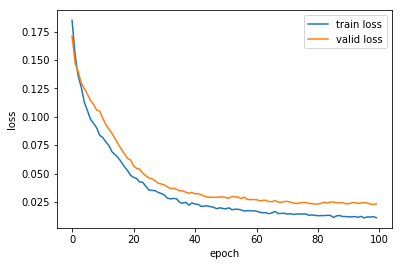

In [149]:
%matplotlib inline
visualize.plot_loss(net_coor)

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
y_pred = net_coor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(explained_variance_score(y_test.ravel(), y_pred.ravel()))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred)) 

0.178672
0.806459963322
0.0983747
0.802881587356


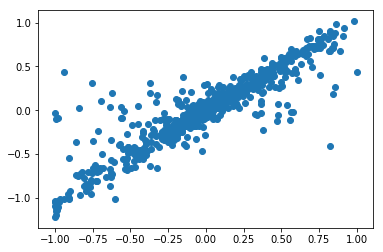

(0.90025949, 2.3138473856794607e-272)

In [151]:
from scipy.stats import pearsonr
plt.clf()
plt.scatter(y_test, net_coor.predict(X_test))
plt.show()
pearsonr(y_test.ravel(), net_coor.predict(X_test).ravel())

In [152]:
def plot_sample(img, y, axis, move=48):
    axis.imshow(img, cmap='gray')
    print(y[0::2])
    print(y[1::2])
    axis.scatter(y[0::2], y[1::2], marker='x', s=5)

In [153]:
y_pred[0].reshape((3, 2))


array([[-0.14013445,  1.01202095],
       [ 0.17494947,  0.8825736 ],
       [ 0.3549467 ,  0.31194606]], dtype=float32)

In [154]:
minmax.inverse_transform(y_pred[0].reshape((1, -1)))

array([[  64.32078552,  128.5450592 ,   71.73954773,  114.7859726 ,
          72.50302887,   79.53901672]], dtype=float32)

[ 64.32078552  71.73954773  72.50302887]
[ 128.5450592   114.7859726    79.53901672]


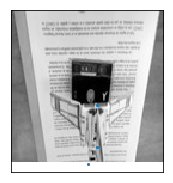

[ 65.67266083  68.64189911  76.1643219 ]
[ 68.96238708  63.60227203  61.50005341]


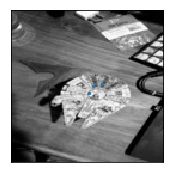

[ 37.1383667   69.39726257  96.88672638]
[ 58.11725998  59.52663803  59.57510376]


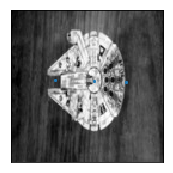

[ 73.26582336  72.68315887  73.71056366]
[ 87.39079285  73.97470093  55.55117416]


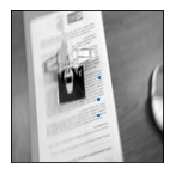

[ 39.84669876  52.77602386  61.00899124]
[ 28.23269272  67.16146088  99.68127441]


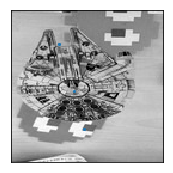

[ 63.92656326  65.2216568   67.34738159]
[ 104.85798645   90.78579712   73.98713684]


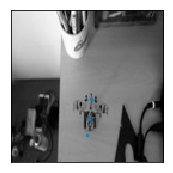

[ 74.54740143  65.15678406  48.21600342]
[ 62.52768326  63.04238892  57.6518364 ]


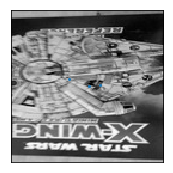

[ 68.5877533   70.80051422  72.16983795]
[ 79.23168945  56.93302155  18.69444656]


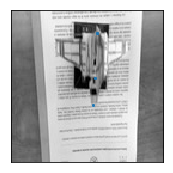

[ 67.1506424   71.49761963  73.6880722 ]
[ 72.27227783  50.65161514  16.54668808]


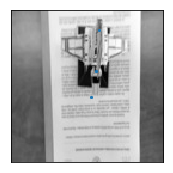

[ 53.78277969  57.12408066  66.83332062]
[  48.60564423   76.85759735  103.82962799]


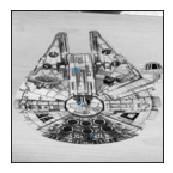

[ 62.82933044  63.61084366  62.19293594]
[ 56.90756607  74.51291656  92.28883362]


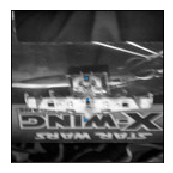

[ 104.39636993   79.15101624   43.25414658]
[ 63.9867897   64.14071655  65.36054993]


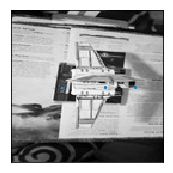

[ 66.40582275  65.17190552  64.26826477]
[ 71.05312347  81.31795502  92.34113312]


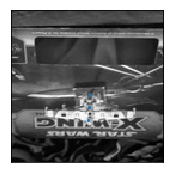

[ 106.89373016   68.77687073   25.33050156]
[ 58.01528549  62.00286865  65.12796021]


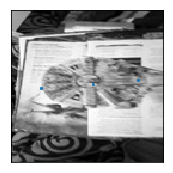

[ 64.3433075   65.40105438  67.2629776 ]
[ 105.30173492   92.81206512   77.37709045]


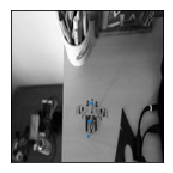

[ 75.12692261  80.00134277  85.45088196]
[ 127.01487732   86.65329742   37.19535446]


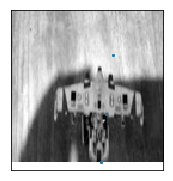

[ 69.34074402  69.24316406  71.20357513]
[ 96.17471313  72.38111877  40.46501923]


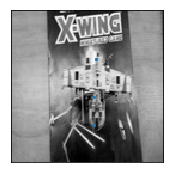

[ 62.23712158  64.58742523  65.3156662 ]
[ 93.47904968  78.58083344  46.77809906]


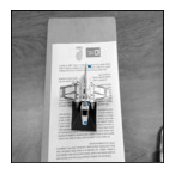

[ 91.64650726  75.96825409  55.12195587]
[ 74.01746368  67.36599731  56.02296829]


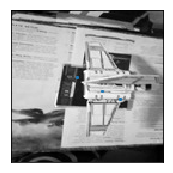

[ 68.3837738   22.66946411  -7.27724266]
[ 53.45520401  58.13785934  61.42311859]


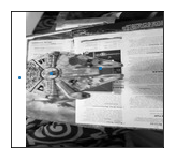

[ 55.08231354  18.34591675  -5.70757389]
[ 53.87885666  60.3359108   61.93035889]


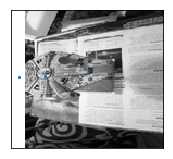

[ 69.14286804  60.59399033  45.25979996]
[ 88.53018951  83.32048035  65.68460846]


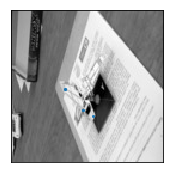

[ 72.3784256   37.985569    10.59198666]
[ 59.49238968  61.21389771  64.59624481]


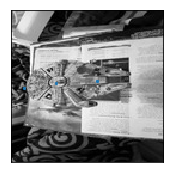

[ 66.18847656  75.50418854  83.55612946]
[ 88.05820465  67.24467468  47.35206985]


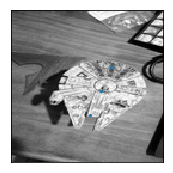

[ 92.16931915  94.33610535  99.00803375]
[ 108.47489929   71.78050232   35.66217422]


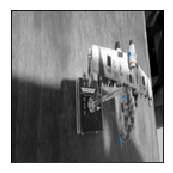

[ 105.53398132   74.03141022   15.6069231 ]
[ 62.48537445  69.26785278  67.7155838 ]


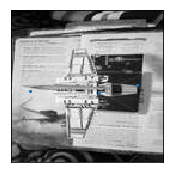

[ 58.34971237  66.93592834  62.509758  ]
[ 97.29363251  70.83087921  20.78463364]


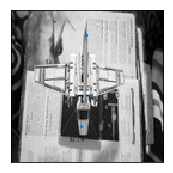

[ 83.88180542  64.33177948  47.78158569]
[ 95.05892181  81.33707428  62.33824921]


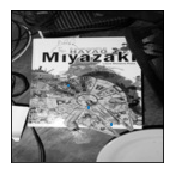

[ 50.32805634  66.91458893  79.89340973]
[ 62.17141724  63.18442154  64.41783905]


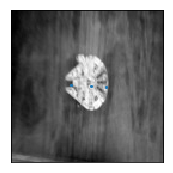

[ 63.86339569  71.74913025  74.36730957]
[ 123.99902344  111.18856049   77.84320831]


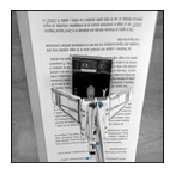

[ 113.86471558   68.51352692   17.3697052 ]
[ 56.93799973  63.74824142  64.08650208]


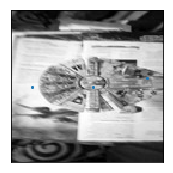

[ 63.22224808  65.46801758  62.85814667]
[ 96.89484406  66.51628113  26.66172791]


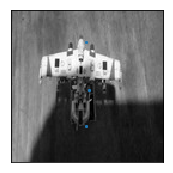

[ 36.52333069  68.35155487  97.22393036]
[ 58.07638168  58.87288284  58.32229233]


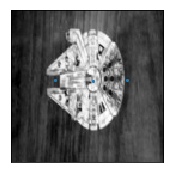

[ 63.69143295  65.18757629  67.48336029]
[ 105.33209229   92.65823364   76.56845093]


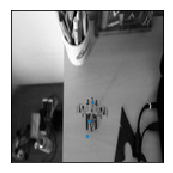

[ 49.34920883  65.46104431  77.34505463]
[ 63.52640152  63.29663849  66.27784729]


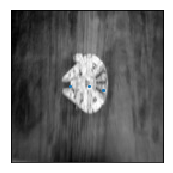

[ 39.92307663  48.83260345  52.78954697]
[ 106.88269043   78.878685     20.97751999]


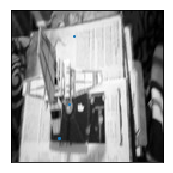

[ 96.58730316  69.35753632  18.03388596]
[ 67.15652466  69.69103241  66.34120941]


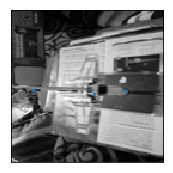

[ 74.91345215  38.96030045   8.33991814]
[ 56.79372787  58.45297623  62.9996109 ]


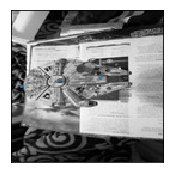

[ 65.73329163  66.21949768  65.52404785]
[ 93.81931305  69.27507019  43.15858459]


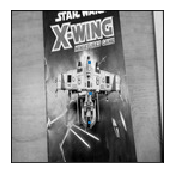

[ 65.3008728   69.443573    64.92089081]
[ 92.69603729  78.47007751  52.28155136]


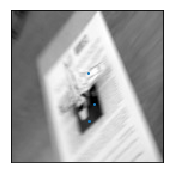

[ 49.09730911  65.87580109  79.12561035]
[ 62.51837921  62.94850922  65.74262238]


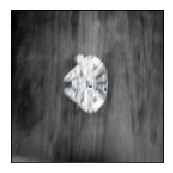

[ 48.77501297  65.57710266  78.78266144]
[ 63.17137909  64.4030304   67.60538483]


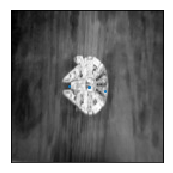

[ 91.07432556  41.69784164  -0.34990036]
[ 57.40958023  61.71808624  65.30407715]


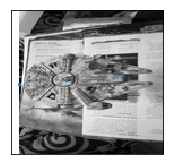

[ 84.40087128  42.56959534   6.55765486]
[ 63.13099289  66.33522034  68.27819824]


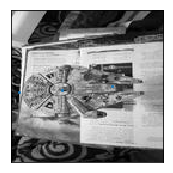

[ 64.93408203  70.2521286   73.44321442]
[ 92.82814026  72.5426178   36.12123108]


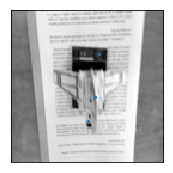

[ 80.30194092  80.85704041  78.74269867]
[ 122.26168823   72.30189514   22.01431465]


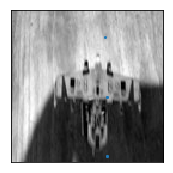

[ 68.48500061  67.73705292  65.15420532]
[ 58.84697723  32.49110031   3.0179584 ]


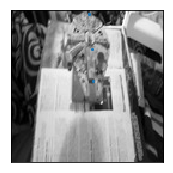

[ 65.84362793  62.76635361  67.46946716]
[ 69.45422363  77.86857605  77.27456665]


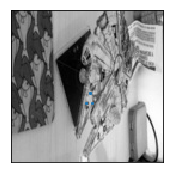

[ 68.20103455  70.47237396  68.33798218]
[ 89.82330322  68.88346863  32.68564224]


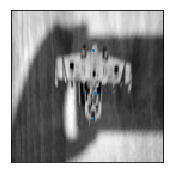

[ 92.61787415  82.89472961  66.38754272]
[ 67.07469177  72.69459534  69.24810028]


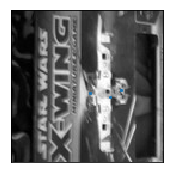

[ 57.23793411  59.23101807  61.47522354]
[ 63.27144623  77.9790802   94.06723022]


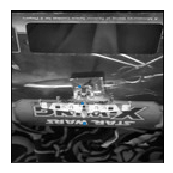

[ 62.86256409  66.46761322  65.01293182]
[ 106.25534058   95.0087204    81.61927795]


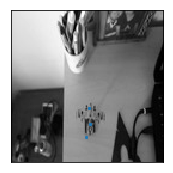

[ 76.22251129  57.26622391  20.65084457]
[ 62.43393326  64.95890045  65.02354431]


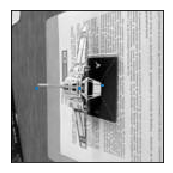

[ 103.99932098   71.09385681   11.22581673]
[ 79.8927002   85.40185547  94.36875916]


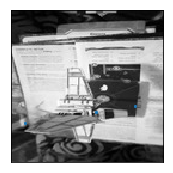

[ 80.47457886  33.45331192  -2.51101828]
[ 55.18928146  60.89064407  63.00452423]


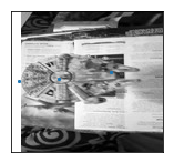

[ 63.39580536  65.27558136  67.88230896]
[ 105.60668945   91.28923035   74.81652832]


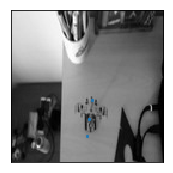

[ 63.17713928  59.90278625  57.88835144]
[ 52.54906464  64.3254776   72.45262146]


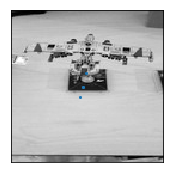

[ 84.40087128  42.56959534   6.55765486]
[ 63.13099289  66.33522034  68.27819824]


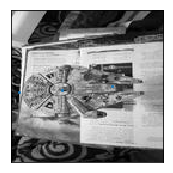

[ 73.51679993  74.94290161  67.44934845]
[ 89.6000061   70.27346802  43.50474548]


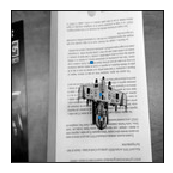

[ 82.91526794  51.40577698  32.72393036]
[ 53.81620789  62.90005875  63.15140533]


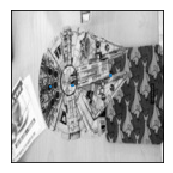

[ 109.55162811   70.58718872   26.3752346 ]
[ 57.51706696  63.33757019  66.69693756]


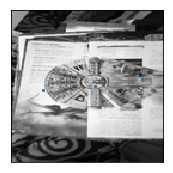

[ 62.35863113  67.05608368  66.26129913]
[ 111.19184113  100.63543701   88.7240448 ]


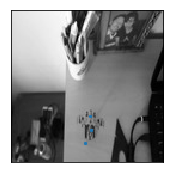

[ 60.40488052  58.74763489  55.39002228]
[ 48.69766617  64.75917053  78.76448822]


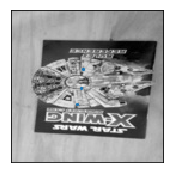

[ 63.64617157  65.57888031  67.69446564]
[ 105.61904907   91.27132416   73.97724152]


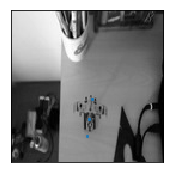

[ 84.49242401  87.25641632  85.85858154]
[ 103.75419617   46.67627716   -1.76135147]


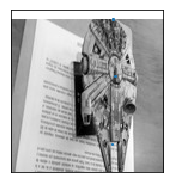

[ 71.10809326  69.30210876  66.76568604]
[ 74.33126068  53.2088623   21.25353813]


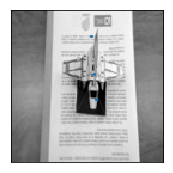

[ 66.81202698  61.27508545  47.63208008]
[ 84.32745361  78.37905121  60.34209442]


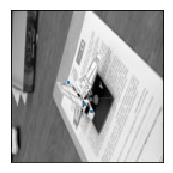

[ 67.52788544  69.05023193  67.49308777]
[ 70.92879486  50.76821899  21.02803421]


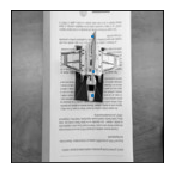

[ 57.58111191  59.59575272  61.68139648]
[ 61.11500931  77.28058624  93.26434326]


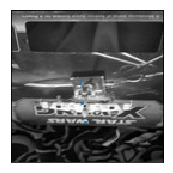

[ 69.51761627  68.77879333  64.30095673]
[ 80.15646362  63.90758514  27.83473587]


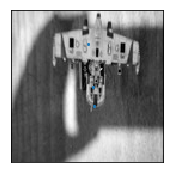

[ 72.29547119  55.0649147   23.97849274]
[ 30.74332428  36.71321487  44.77791977]


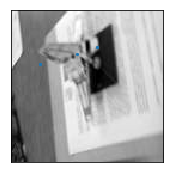

[ 61.88619614  67.65255737  66.53540039]
[ 111.56878662   99.73986053   86.98802948]


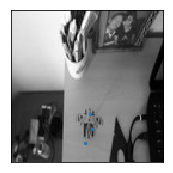

[ 109.87572479   76.18656921    7.18011141]
[ 49.5277977   54.04972839  50.76159286]


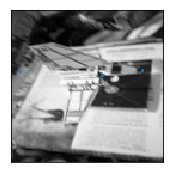

[ 64.32536316  64.9845047   66.43082428]
[ 71.09031677  82.80710602  97.95888519]


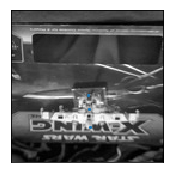

[ 92.95087433  96.37584686  98.88028717]
[ 109.98731995   72.8181839    31.91942215]


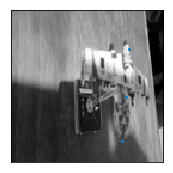

[ 77.13659668  81.51968384  84.10057068]
[ 96.17629242  75.47657776  51.3250885 ]


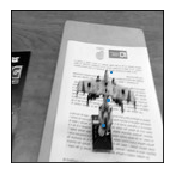

[ 62.37545013  72.15582275  73.84796906]
[ 118.90937042  102.1411972    64.47898102]


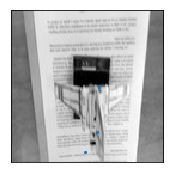

[ 62.94157791  20.92991257 -10.55465698]
[ 53.39804459  60.75103378  64.44639587]


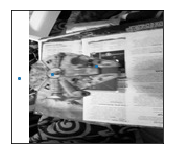

[ 77.01952362  27.45612907  -4.72764492]
[ 57.41187286  61.26396179  63.48158264]


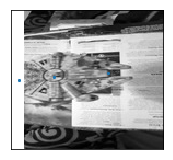

[ 63.11830521  64.89225006  66.46360779]
[ 104.63592529   93.43449402   78.30916595]


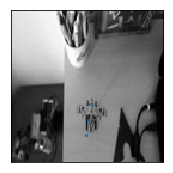

[ 94.08514404  74.68836212  29.73324013]
[ 67.88092041  69.41996765  69.78660583]


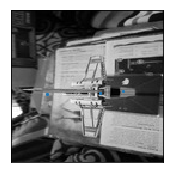

[ 56.31425476  16.8071804  -11.46837997]
[ 52.1437149   59.61566925  62.3997879 ]


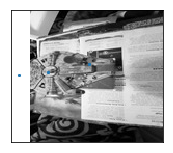

[ 82.68384552  41.87794876   9.27297592]
[ 57.30899429  61.95164108  61.19251633]


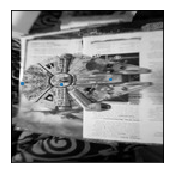

[ 66.46046448  64.77719879  56.80664825]
[ 55.70135498  69.68814087  79.33087158]


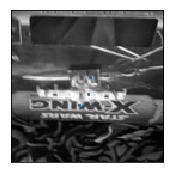

[ 65.55716705  59.92672348  56.36221313]
[ 69.26817322  71.61573792  66.79207611]


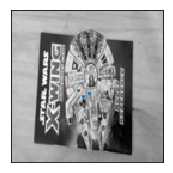

[ 68.12130737  71.74571228  72.93260193]
[ 67.79212189  43.23374176  13.78767204]


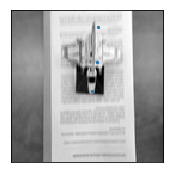

[ 104.66775513   75.96511078   23.85039902]
[ 64.93450165  71.48088074  78.33254242]


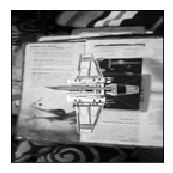

[ 56.27888107  18.25236511  -6.35753012]
[ 53.71022034  59.15160751  61.90071106]


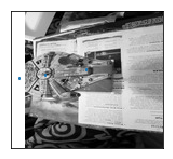

[ 101.12498474   37.54514694   -1.79218292]
[ 55.30447769  58.38228226  60.37781525]


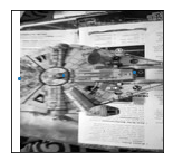

[ 68.34898376  22.36103058  -7.76261759]
[ 53.30241394  58.06517029  61.42749786]


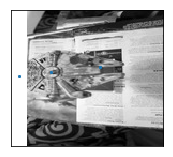

[ 67.23628235  71.48516083  73.79146576]
[ 72.08078003  50.29178238  16.11948586]


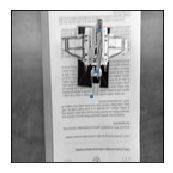

[ 67.23628235  71.48516083  73.79146576]
[ 72.08078003  50.29178238  16.11948586]


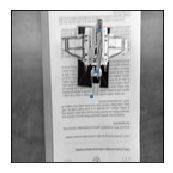

[ 62.22374344  65.95009613  65.87512207]
[ 112.50315857  102.00641632   91.3347168 ]


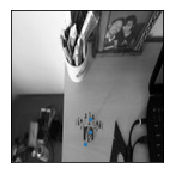

[ 61.9594841   64.44560242  65.27755737]
[ 93.85494232  78.97796631  47.31824493]


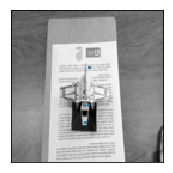

[ 103.16159058   82.08934784   50.4856987 ]
[ 65.75287628  64.99594116  63.3992157 ]


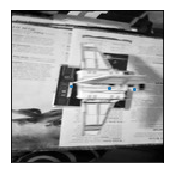

[  93.51561737   95.9863205   100.7667923 ]
[ 109.2525177    71.67932129   34.27883148]


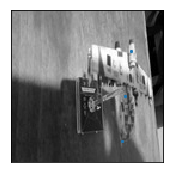

[ 73.82499695  65.32501984  48.97399521]
[ 62.54938889  62.83992004  57.33810425]


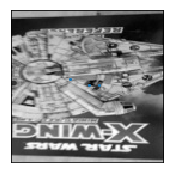

[ 104.15255737   82.01384735   31.01659775]
[  86.71636963   90.39916992  104.70555878]


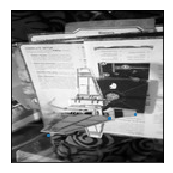

[ 67.09043884  68.10559845  67.89126587]
[ 82.68252563  63.47796631  44.5833168 ]


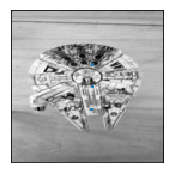

[ 91.8576889   60.22491074  31.50965118]
[ 58.17131424  43.34911728  32.52203751]


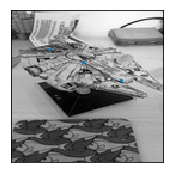

[ 63.87595367  67.3127594   69.15556335]
[ 107.6111908    78.62081909   35.04403305]


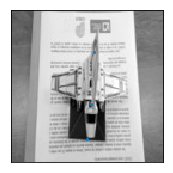

[ 93.04656982  41.50899506  -0.39802259]
[ 58.90473557  62.24295807  65.65341187]


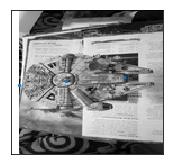

[ 62.64961243  68.94872284  71.11023712]
[ 93.26463318  73.84080505  50.67237091]


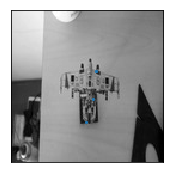

[ 83.61419678  43.79582977  -0.40974697]
[ 63.86549759  66.23577118  57.52606201]


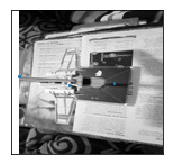

[ 93.48615265  81.15540314  62.34389877]
[ 68.53544617  73.10031128  73.02277374]


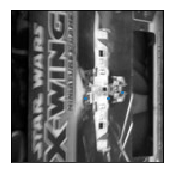

[ 72.12680054  74.31126404  73.39580536]
[ 72.21774292  54.0159111   33.04198074]


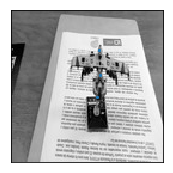

[ 64.95471191  68.86915588  70.39294434]
[ 83.70076752  72.47708893  55.74311066]


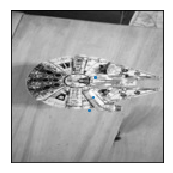

[ 34.98804474  68.04589081  96.3835144 ]
[ 57.65634155  57.76578903  56.81052017]


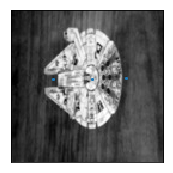

[ 45.0539093   63.31431198  79.82363892]
[ 67.03321075  68.48041534  69.18445587]


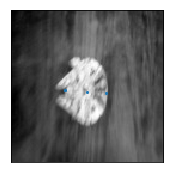

[ 103.02078247   75.25661469   36.20893097]
[ 61.06936264  68.25231171  75.18635559]


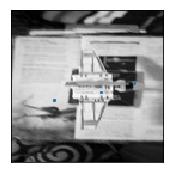

[ 85.01374054  40.96990204   1.69276178]
[ 53.53271484  56.75268555  62.30410767]


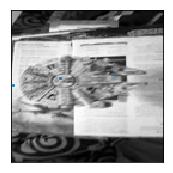

[ 64.7218399   65.03762817  63.47391129]
[ 93.53607941  66.64989471  26.36237907]


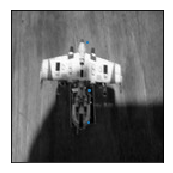

[ 105.91804504   75.32997131   17.67511368]
[ 62.84012222  67.38607788  65.46766663]


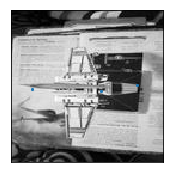

[ 50.75643539  66.12168121  77.23097992]
[ 62.8838501   63.11407471  65.56074524]


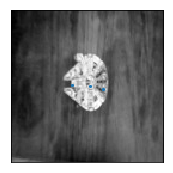

[ 106.19195557   84.39026642   31.24281311]
[  86.73096466   89.66983032  105.08052826]


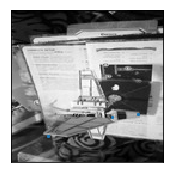

[ 70.42835236  69.74226379  59.42699432]
[ 81.36964417  67.07138824  39.7274437 ]


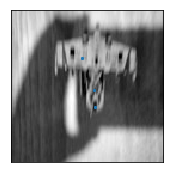

[ 68.09397888  67.71317291  64.68431091]
[ 100.32142639   78.91195679   46.63570023]


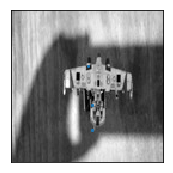

[ 66.21743774  62.75641632  63.67683029]
[ 67.9402771   74.81828308  79.26612091]


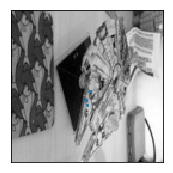

[ 109.28360748   81.61933136   15.59206676]
[ 65.39388275  67.27027893  62.2214241 ]


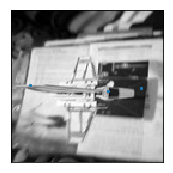

[ 70.37699127  72.91874695  71.60610962]
[ 67.92053223  45.35997391  15.03266907]


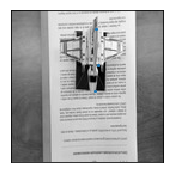

[ 93.17728424  59.690979    33.0298996 ]
[ 53.93367004  59.08982849  59.78320694]


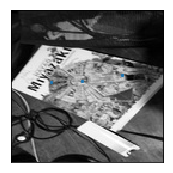

[ 84.41299438  43.09142303   7.27449322]
[ 63.89878845  66.51963043  68.24900818]


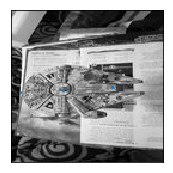

[ 66.07160187  68.59519196  76.01676941]
[ 68.22293854  63.67552948  62.33119583]


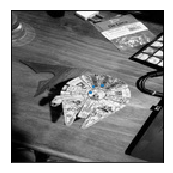

[ 67.95839691  68.04959106  64.27561951]
[ 69.56617737  56.8051033   38.94644547]


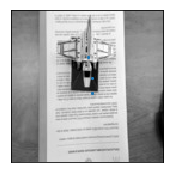

[ 71.72038269  84.26200104  94.45649719]
[ 86.93859863  62.99869537  43.34406281]


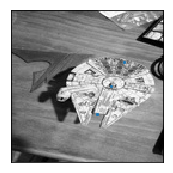

In [155]:
for i in range(X_test.shape[0]):
    plt.clf()
    fig = plt.figure(figsize=(6, 3))
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    img = X_test[i].reshape(128, 128)
    plot_sample(img, minmax.inverse_transform(y_pred[i].reshape((1, -1)))[0], ax)
    plt.show()

In [156]:
import time
import cv2

def regresor_over_video(file_name):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128), interpolation = cv2.INTER_CUBIC)
        X = format_net(res)

        y_pred = minmax.inverse_transform(net_coor.predict(X)).ravel()
        for i in range(0, y_pred.shape[0], 2):
            new_scale = int(y_pred[i]*(frame.shape[1]/128.)), int(y_pred[i + 1] * (frame.shape[0]/128.))
            cv2.circle(frame, new_scale, 30, 155, -1)
        cv2.imshow('frame',frame)
        cv2.waitKey(1)
        
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
regresor_over_video("data/videos_demo/lambda_regresor.mp4")

### Quiero profundizar más!

- [Neural Networks and Deep Learning free online book](http://neuralnetworksanddeeplearning.com/index.html)
- [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/)
- [Unsupervised Feature Learning and Deep Learning.](http://deeplearning.stanford.edu/tutorial/)

![alt text](../images/bye.jpg)
